<a href="https://colab.research.google.com/github/roitraining/PythonML/blob/Development/Ch08-RegressionAnalysis/08-01-RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


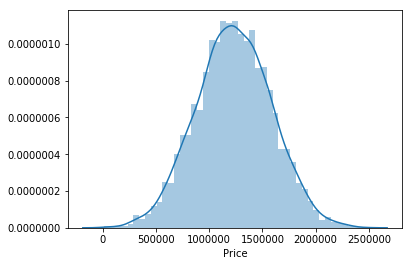

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

USAhousing = pd.read_csv('USA_Housing.csv')
print (USAhousing.columns)
display(USAhousing.head())

sns.distplot(USAhousing['Price'])



[2.15666957e+01 1.65453042e+05 1.20499839e+05 1.99978534e+03
 1.53406038e+01]
[1257919.72909699  822112.41884207 1740669.05865488  972452.12917501
  993422.26329328  644126.07414468 1073911.79101704  856584.00194128
 1445318.25518361 1204342.19071154]
1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
Name: Price, dtype: float64
Mean squared error: 10100187858.86
Variance score: 0.92


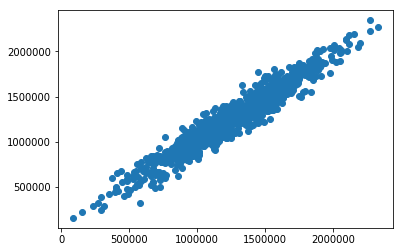

In [7]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# train,test = train_test_split(USAHousing,test_size = 0.4, random_state = 101)

# trainX = train[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
#                'Avg. Area Number of Bedrooms', 'Area Population']]
# trainY = train['Price']



x = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, train_size = .8, random_state = 101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(trainX, trainY) # lm <- lm("price~bed+room+income", data)
print (lm.coef_)

predictions = lm.predict(testX)
print (predictions[:10])
print (testY[:10])

plt.scatter(testY, predictions)

print ("Mean squared error: %.2f" % mean_squared_error(testY, predictions))
print ('Variance score: %.2f' % r2_score(testY, predictions))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:11:02   Log-Likelihood:                -55246.
No. Observations:                4000   AIC:                         1.105e+05
Df Residuals:                    3995   BIC:                         1.105e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2716      0.300     34.254      0.000       9.684      10.860
Avg. Area House Age            4.92e+04   3301.255     14.904      0.000    4.27e+04    5.57e+04
Avg. Area Number of Rooms     -1.06e+04   3652.223     -2.901      0.004   -1.78e+04   -3435.745
Avg. Area Number of Bedrooms  4927.2046   3492.874      1.411      0.158   -1920.777    1.18e+04
Area Population                  8.4095      0.365     23.054      0.000       7.694       9.125
==============================================================================
Omnibus:                        0.315   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.352
Skew:                          -0.017   Prob(JB):                        0.839
Kurtosis:                       2.969   Cond. No.                     9.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

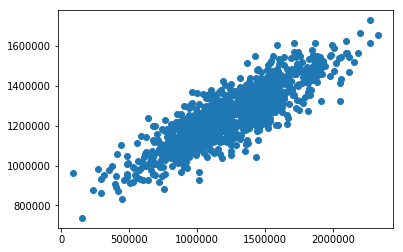

In [10]:
%matplotlib inline
import statsmodels.api as sm

model = sm.OLS(trainY, trainX).fit()
display (model.summary())

predictions = model.predict(testX) # make the predictions by the model
plt.scatter(testY, predictions)


# End of notebook